In [91]:
import pandas as pd
from params import *
from data import *
import pickle
from models import *
import os
from torch import nn
from torch.optim import Adam
from train import Trainer
from eval import *
from metrics import *
from sklearn.manifold import TSNE
from encoding import *

In [92]:
pth = 'data/big_data/kinetics400_5per/train/'
pth_to_save_images = 'data/big_data/kinetics400_5per/devided/images/'
pth_to_save_audio = 'data/big_data/kinetics400_5per/devided/audios/'

In [93]:
import cv2
from pydub import AudioSegment
import os

c = 0

def extract_frame_and_audio(video_path, image_output_path, audio_output_path):
    """
    Извлекает первый кадр из видео и аудиодорожку, сохраняя их в указанные пути.
    Использует OpenCV для извлечения кадра и pydub для извлечения аудио.
    Убедитесь, что пути к изображению имеют правильное расширение (например, .jpg или .png).

    Args:
        video_path (str): Путь к исходному MP4 файлу.
        image_output_path (str): Путь для сохранения первого кадра (изображения). Должен заканчиваться на .jpg или .png.
        audio_output_path (str): Путь для сохранения аудиодорожки (WAV файл).
    """
    # Извлечение первого кадра с помощью OpenCV
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    if ret:
        # Убедимся, что путь к изображению имеет правильное расширение
        if not (image_output_path.lower().endswith('.jpg') or image_output_path.lower().endswith('.png')):
            raise ValueError("Путь к изображению должен заканчиваться на .jpg или .png")
        cv2.imwrite(image_output_path, frame)
    else:
        raise ValueError(f"Не удалось прочитать кадр из видео: {video_path}")
    cap.release()

    # Извлечение аудио с помощью pydub
    try:
        audio = AudioSegment.from_file(video_path, format="mp4")
        audio.export(audio_output_path, format="wav")
    except:
        c += 1

In [94]:
#### В файлах валялись файлы с расширением .part и .yadl(что-то такое), .webm и пара ломаных файлов, я вручную их удалил

In [95]:
# for class_name in tqdm(os.listdir(pth)):
#     os.mkdir(pth_to_save_images + class_name + '/')
#     os.mkdir(pth_to_save_audio + class_name + '/')
#     for video_name in os.listdir(pth + class_name + '/'):
#         extract_frame_and_audio(pth + class_name + '/' + video_name, pth_to_save_images + class_name + '/' + video_name.split('.')[0] + '.jpg', pth_to_save_audio + class_name + '/' + video_name.split('.')[0] + '.wav')

In [96]:
imgs = {
    OBJECT1_COLUMN_NAME: [],
    OBJECT2_COLUMN_NAME: []
}
for t in tqdm(os.listdir(pth_to_save_images)):
    for f in os.listdir(pth_to_save_images + t):
        imgs[OBJECT1_COLUMN_NAME].append(pth_to_save_images + t + '/' + f)
        imgs[OBJECT2_COLUMN_NAME].append(t)

100%|██████████| 400/400 [00:00<00:00, 15283.42it/s]


In [97]:
df_image = pd.DataFrame.from_dict(imgs)

In [98]:
df_image[TYPE1_COLUMN_NAME] = TYPE_IMAGE
df_image[TYPE2_COLUMN_NAME] = TYPE_TEXT

In [99]:
df_image.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
1,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
2,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
3,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
4,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text


In [100]:
audios = {
    OBJECT1_COLUMN_NAME: [],
    OBJECT2_COLUMN_NAME: []
}
for t in tqdm(os.listdir(pth_to_save_audio)):
    for f in os.listdir(pth_to_save_audio + t):
        audios[OBJECT1_COLUMN_NAME].append(pth_to_save_audio + t + '/' + f)
        audios[OBJECT2_COLUMN_NAME].append(t)

100%|██████████| 400/400 [00:00<00:00, 16012.92it/s]


In [101]:
df_audio = pd.DataFrame.from_dict(audios)

In [102]:
df_audio[TYPE1_COLUMN_NAME] = TYPE_AUDIO
df_audio[TYPE2_COLUMN_NAME] = TYPE_TEXT

In [103]:
df_audio.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
1,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
2,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
3,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
4,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text


In [104]:
df = pd.concat([df_image, df_audio], axis=0, ignore_index=True)

In [105]:
initial = InitialDataset(df)

In [106]:
# id_texts = initial.return_texts()
# id_image = initial.return_images()
# id_audio = initial.return_audios()

In [107]:
# txt_encoder = TextEncoder()
# encoded_text = txt_encoder.encode_dict(id_texts)

In [108]:
# with open('data\\big_data\\kinetics400_5per\\id_text.pickle', 'wb') as f:
#     pickle.dump(encoded_text, f)

In [109]:
# img_encoder = ImageEncoder()
# encoded_img = img_encoder.encode_from_paths(id_image)

In [110]:
# with open('data\\big_data\\kinetics400_5per\\id_img.pickle', 'wb') as f:
#     pickle.dump(encoded_img, f)

In [111]:
# audio_encoder = AudioEncoder()
# encoded_audio = audio_encoder.encode_from_paths(id_audio)

In [112]:
# with open('data\\big_data\\kinetics400_5per\\id_audio.pickle', 'wb') as f:
#     pickle.dump(encoded_audio, f)

In [113]:
with open('data\\big_data\\kinetics400_5per\\id_text.pickle', 'rb') as f:
    id_text = pickle.load(f)
with open('data\\big_data\\kinetics400_5per\\id_img.pickle', 'rb') as f:
    id_image = pickle.load(f)
with open('data\\big_data\\kinetics400_5per\\id_audio.pickle', 'rb') as f:
    id_audio = pickle.load(f)

In [114]:
orig_embs = id_image | id_text | id_audio

In [137]:
ds = ID_Dataset(initial.return_id_df(mode=TYPE_IMAGE), orig_embs) # Датасет pytorch для обучения
train_dataset, test_dataset = torch.utils.data.random_split(ds, [0.8, 0.2])
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=False)
model_images = ConverterModel(512, 768).to(DEVICE)
optim = Adam(model_images.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [138]:
trainer = Trainer(
    model=model_images,
    dataset=ds,
    dl=train_dataloader,
    epochs=50,
    batch_size=TRAIN_BATCH_SIZE,
    optimizer=optim,
    criterion=criterion
)

model_images = trainer.train()

100%|██████████| 17/17 [00:00<00:00, 115.76it/s]


Epoch 1. Loss = 1.9383721848953428e-05


100%|██████████| 17/17 [00:00<00:00, 124.54it/s]


Epoch 2. Loss = 1.2363539383386524e-05


100%|██████████| 17/17 [00:00<00:00, 126.63it/s]


Epoch 3. Loss = 1.1850955672798591e-05


100%|██████████| 17/17 [00:00<00:00, 127.16it/s]


Epoch 4. Loss = 1.1559293056961906e-05


100%|██████████| 17/17 [00:00<00:00, 97.24it/s]


--- Metric ---
Mean = 0.8675445914268494
STD = 0.01300277654081583
median = 0.8690854907035828



100%|██████████| 17/17 [00:00<00:00, 116.06it/s]


Epoch 6. Loss = 1.1366628427822434e-05


100%|██████████| 17/17 [00:00<00:00, 116.97it/s]


Epoch 7. Loss = 1.1270473862623476e-05


100%|██████████| 17/17 [00:00<00:00, 127.60it/s]


Epoch 8. Loss = 1.1194337673714472e-05


100%|██████████| 17/17 [00:00<00:00, 128.43it/s]


Epoch 9. Loss = 1.1107648560937378e-05


100%|██████████| 17/17 [00:00<00:00, 50.41it/s]


--- Metric ---
Mean = 0.8726245164871216
STD = 0.017219234257936478
median = 0.8717248439788818



100%|██████████| 17/17 [00:00<00:00, 112.93it/s]


Epoch 11. Loss = 1.0920733188868326e-05


100%|██████████| 17/17 [00:00<00:00, 122.10it/s]


Epoch 12. Loss = 1.0835797354502574e-05


100%|██████████| 17/17 [00:00<00:00, 121.30it/s]


Epoch 13. Loss = 1.0756130450317869e-05


100%|██████████| 17/17 [00:00<00:00, 128.55it/s]


Epoch 14. Loss = 1.0653082313183404e-05


100%|██████████| 17/17 [00:00<00:00, 103.75it/s]


--- Metric ---
Mean = 0.8780018091201782
STD = 0.01983126439154148
median = 0.8768468499183655



100%|██████████| 17/17 [00:00<00:00, 118.75it/s]


Epoch 16. Loss = 1.0438716458338604e-05


100%|██████████| 17/17 [00:00<00:00, 112.80it/s]


Epoch 17. Loss = 1.0322102184545656e-05


100%|██████████| 17/17 [00:00<00:00, 126.71it/s]


Epoch 18. Loss = 1.019433716464846e-05


100%|██████████| 17/17 [00:00<00:00, 121.99it/s]


Epoch 19. Loss = 1.0075817215238203e-05


100%|██████████| 17/17 [00:00<00:00, 104.46it/s]


--- Metric ---
Mean = 0.8847925066947937
STD = 0.02853766269981861
median = 0.8837606906890869



100%|██████████| 17/17 [00:00<00:00, 111.73it/s]


Epoch 21. Loss = 9.810665630993753e-06


100%|██████████| 17/17 [00:00<00:00, 121.62it/s]


Epoch 22. Loss = 9.711501434139791e-06


100%|██████████| 17/17 [00:00<00:00, 128.47it/s]


Epoch 23. Loss = 9.550948220748978e-06


100%|██████████| 17/17 [00:00<00:00, 125.02it/s]


Epoch 24. Loss = 9.404456477568601e-06


100%|██████████| 17/17 [00:00<00:00, 107.63it/s]


--- Metric ---
Mean = 0.8918135762214661
STD = 0.03142448887228966
median = 0.8904935717582703



100%|██████████| 17/17 [00:00<00:00, 122.41it/s]


Epoch 26. Loss = 9.197158931328886e-06


100%|██████████| 17/17 [00:00<00:00, 116.93it/s]


Epoch 27. Loss = 9.046452191796561e-06


100%|██████████| 17/17 [00:00<00:00, 125.23it/s]


Epoch 28. Loss = 8.890626190805051e-06


100%|██████████| 17/17 [00:00<00:00, 128.44it/s]


Epoch 29. Loss = 8.772030867021385e-06


100%|██████████| 17/17 [00:00<00:00, 107.06it/s]


--- Metric ---
Mean = 0.8994869589805603
STD = 0.04116499796509743
median = 0.8981351852416992



100%|██████████| 17/17 [00:00<00:00, 114.99it/s]


Epoch 31. Loss = 8.551459586669807e-06


100%|██████████| 17/17 [00:00<00:00, 123.21it/s]


Epoch 32. Loss = 8.390048151341034e-06


100%|██████████| 17/17 [00:00<00:00, 115.74it/s]


Epoch 33. Loss = 8.211613618414049e-06


100%|██████████| 17/17 [00:00<00:00, 121.36it/s]


Epoch 34. Loss = 8.050862703612438e-06


100%|██████████| 17/17 [00:00<00:00, 107.60it/s]


--- Metric ---
Mean = 0.9062110781669617
STD = 0.06282927095890045
median = 0.9069886803627014



100%|██████████| 17/17 [00:00<00:00, 122.80it/s]


Epoch 36. Loss = 8.052651509160569e-06


100%|██████████| 17/17 [00:00<00:00, 119.59it/s]


Epoch 37. Loss = 8.024468655776218e-06


100%|██████████| 17/17 [00:00<00:00, 126.64it/s]


Epoch 38. Loss = 7.844927353062303e-06


100%|██████████| 17/17 [00:00<00:00, 125.69it/s]


Epoch 39. Loss = 7.7352706568945e-06


100%|██████████| 17/17 [00:00<00:00, 107.48it/s]


--- Metric ---
Mean = 0.9088408946990967
STD = 0.07907944917678833
median = 0.9121658802032471



100%|██████████| 17/17 [00:00<00:00, 112.11it/s]


Epoch 41. Loss = 7.414430427843399e-06


100%|██████████| 17/17 [00:00<00:00, 125.63it/s]


Epoch 42. Loss = 7.246921938985906e-06


100%|██████████| 17/17 [00:00<00:00, 125.30it/s]


Epoch 43. Loss = 7.167933347318467e-06


100%|██████████| 17/17 [00:00<00:00, 122.55it/s]


Epoch 44. Loss = 7.194324950887676e-06


100%|██████████| 17/17 [00:00<00:00, 107.40it/s]


--- Metric ---
Mean = 0.9138914942741394
STD = 0.0940587967634201
median = 0.9208811521530151



100%|██████████| 17/17 [00:00<00:00, 120.54it/s]


Epoch 46. Loss = 7.245648959042228e-06


100%|██████████| 17/17 [00:00<00:00, 105.11it/s]


Epoch 47. Loss = 7.996332328730205e-06


100%|██████████| 17/17 [00:00<00:00, 120.28it/s]


Epoch 48. Loss = 7.658873187210702e-06


100%|██████████| 17/17 [00:00<00:00, 122.45it/s]


Epoch 49. Loss = 7.84656020869079e-06


100%|██████████| 17/17 [00:00<00:00, 102.10it/s]


--- Metric ---
Mean = 0.9121494293212891
STD = 0.08527574688196182
median = 0.9156220555305481



In [139]:
test_dataloader = DataLoader(test_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=False)
for b in test_dataloader:
    _, emb_x, _, emb_y = b
    pred = encode_tensors(model_images, emb_x)
    show_cosine_metric(pred, emb_y)

100%|██████████| 1/1 [00:00<00:00, 219.45it/s]


--- Metric ---
Mean = 0.8500982522964478
STD = 0.15178033709526062
median = 0.8636063933372498



100%|██████████| 1/1 [00:00<00:00, 249.71it/s]


--- Metric ---
Mean = 0.8481122255325317
STD = 0.14021144807338715
median = 0.8589611649513245



100%|██████████| 1/1 [00:00<00:00, 177.30it/s]


--- Metric ---
Mean = 0.8389226198196411
STD = 0.17321594059467316
median = 0.8641003370285034



100%|██████████| 1/1 [00:00<00:00, 242.96it/s]


--- Metric ---
Mean = 0.8484130501747131
STD = 0.15194162726402283
median = 0.864536464214325



100%|██████████| 1/1 [00:00<00:00, 498.08it/s]

--- Metric ---
Mean = 0.8672103881835938
STD = 0.09954793006181717
median = 0.8649291396141052



In [140]:
i_embs = ds.get_embs_from_ids(initial.return_ids_of_objects(TYPE_IMAGE))
i_res = encode_tensors(model_images, i_embs)
i_dict = {i: v for i, v in zip(initial.return_ids_of_objects(TYPE_IMAGE), i_res)}

100%|██████████| 22/22 [00:00<00:00, 110.50it/s]


In [141]:
ds = ID_Dataset(initial.return_id_df(mode=TYPE_AUDIO), orig_embs)
train_dataset, test_dataset = torch.utils.data.random_split(ds, [0.8, 0.2])
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=False)
model_audio = ConverterModel(512, 768).to(DEVICE)
optim = Adam(model_audio.parameters(), lr=5e-4)
criterion = nn.MSELoss()

print('Starting trainining...')

trainer = Trainer(
    model=model_audio,
    dataset=ds,
    dl=train_dataloader,
    epochs=50,
    batch_size=TRAIN_BATCH_SIZE,
    optimizer=optim,
    criterion=criterion
)

model_audio = trainer.train()

Starting trainining...


100%|██████████| 17/17 [00:00<00:00, 112.67it/s]


Epoch 1. Loss = 2.919791182875997e-05


100%|██████████| 17/17 [00:00<00:00, 117.77it/s]


Epoch 2. Loss = 1.2800402657831e-05


100%|██████████| 17/17 [00:00<00:00, 118.58it/s]


Epoch 3. Loss = 1.1994235421752819e-05


100%|██████████| 17/17 [00:00<00:00, 122.78it/s]


Epoch 4. Loss = 1.1804334235421265e-05


100%|██████████| 17/17 [00:00<00:00, 99.23it/s]


--- Metric ---
Mean = 0.8640822172164917
STD = 0.012575943022966385
median = 0.8654733300209045



100%|██████████| 17/17 [00:00<00:00, 118.71it/s]


Epoch 6. Loss = 1.1723908130534255e-05


100%|██████████| 17/17 [00:00<00:00, 115.27it/s]


Epoch 7. Loss = 1.169764806263629e-05


100%|██████████| 17/17 [00:00<00:00, 123.67it/s]


Epoch 8. Loss = 1.167234830745656e-05


100%|██████████| 17/17 [00:00<00:00, 126.75it/s]


Epoch 9. Loss = 1.1644597122995037e-05


100%|██████████| 17/17 [00:00<00:00, 103.35it/s]


--- Metric ---
Mean = 0.8655925989151001
STD = 0.013860399834811687
median = 0.8662072420120239



100%|██████████| 17/17 [00:00<00:00, 112.46it/s]


Epoch 11. Loss = 1.159489255542212e-05


100%|██████████| 17/17 [00:00<00:00, 112.46it/s]


Epoch 12. Loss = 1.1569830178359553e-05


100%|██████████| 17/17 [00:00<00:00, 124.36it/s]


Epoch 13. Loss = 1.1546578093657445e-05


100%|██████████| 17/17 [00:00<00:00, 120.44it/s]


Epoch 14. Loss = 1.1519145346028381e-05


100%|██████████| 17/17 [00:00<00:00, 97.27it/s]


--- Metric ---
Mean = 0.86702561378479
STD = 0.015416464768350124
median = 0.8670095801353455



100%|██████████| 17/17 [00:00<00:00, 120.59it/s]


Epoch 16. Loss = 1.147312150351354e-05


100%|██████████| 17/17 [00:00<00:00, 104.88it/s]


Epoch 17. Loss = 1.144884606674168e-05


100%|██████████| 17/17 [00:00<00:00, 110.64it/s]


Epoch 18. Loss = 1.1424973934026639e-05


100%|██████████| 17/17 [00:00<00:00, 111.10it/s]


Epoch 19. Loss = 1.1400198218325386e-05


100%|██████████| 17/17 [00:00<00:00, 44.88it/s]


--- Metric ---
Mean = 0.868420422077179
STD = 0.0167692843824625
median = 0.8680357336997986



100%|██████████| 17/17 [00:00<00:00, 101.49it/s]


Epoch 21. Loss = 1.1351724424457643e-05


100%|██████████| 17/17 [00:00<00:00, 121.91it/s]


Epoch 22. Loss = 1.132577762064102e-05


100%|██████████| 17/17 [00:00<00:00, 125.57it/s]


Epoch 23. Loss = 1.1299567802325328e-05


100%|██████████| 17/17 [00:00<00:00, 126.10it/s]


Epoch 24. Loss = 1.1272073550117057e-05


100%|██████████| 17/17 [00:00<00:00, 105.72it/s]


--- Metric ---
Mean = 0.8699719905853271
STD = 0.017428655177354813
median = 0.8696258068084717



100%|██████████| 17/17 [00:00<00:00, 119.54it/s]


Epoch 26. Loss = 1.1207928594103578e-05


100%|██████████| 17/17 [00:00<00:00, 106.41it/s]


Epoch 27. Loss = 1.1182427726907918e-05


100%|██████████| 17/17 [00:00<00:00, 125.94it/s]


Epoch 28. Loss = 1.1140653157326597e-05


100%|██████████| 17/17 [00:00<00:00, 124.68it/s]


Epoch 29. Loss = 1.1099794619440218e-05


100%|██████████| 17/17 [00:00<00:00, 105.17it/s]


--- Metric ---
Mean = 0.8721234202384949
STD = 0.018100297078490257
median = 0.8714560270309448



100%|██████████| 17/17 [00:00<00:00, 110.17it/s]


Epoch 31. Loss = 1.1019298256087495e-05


100%|██████████| 17/17 [00:00<00:00, 113.48it/s]


Epoch 32. Loss = 1.096632331609726e-05


100%|██████████| 17/17 [00:00<00:00, 126.61it/s]


Epoch 33. Loss = 1.0914383096860547e-05


100%|██████████| 17/17 [00:00<00:00, 125.37it/s]


Epoch 34. Loss = 1.0847807175196067e-05


100%|██████████| 17/17 [00:00<00:00, 106.14it/s]


--- Metric ---
Mean = 0.8752381205558777
STD = 0.01892561838030815
median = 0.8739920258522034



100%|██████████| 17/17 [00:00<00:00, 116.57it/s]


Epoch 36. Loss = 1.0718412340793293e-05


100%|██████████| 17/17 [00:00<00:00, 117.37it/s]


Epoch 37. Loss = 1.0650173294379783e-05


100%|██████████| 17/17 [00:00<00:00, 122.36it/s]


Epoch 38. Loss = 1.0569016581030155e-05


100%|██████████| 17/17 [00:00<00:00, 125.40it/s]


Epoch 39. Loss = 1.0489678572866978e-05


100%|██████████| 17/17 [00:00<00:00, 105.36it/s]


--- Metric ---
Mean = 0.8793302178382874
STD = 0.01989329792559147
median = 0.8778306245803833



100%|██████████| 17/17 [00:00<00:00, 107.60it/s]


Epoch 41. Loss = 1.0347417628508992e-05


100%|██████████| 17/17 [00:00<00:00, 120.46it/s]


Epoch 42. Loss = 1.0260967883368721e-05


100%|██████████| 17/17 [00:00<00:00, 115.38it/s]


Epoch 43. Loss = 1.0177674539590953e-05


100%|██████████| 17/17 [00:00<00:00, 122.47it/s]


Epoch 44. Loss = 1.009032820320499e-05


100%|██████████| 17/17 [00:00<00:00, 102.17it/s]


--- Metric ---
Mean = 0.8843703866004944
STD = 0.020660927519202232
median = 0.88252854347229



100%|██████████| 17/17 [00:00<00:00, 123.18it/s]


Epoch 46. Loss = 9.916919339048036e-06


100%|██████████| 17/17 [00:00<00:00, 114.73it/s]


Epoch 47. Loss = 9.830426336066012e-06


100%|██████████| 17/17 [00:00<00:00, 125.82it/s]


Epoch 48. Loss = 9.740094867538573e-06


100%|██████████| 17/17 [00:00<00:00, 125.08it/s]


Epoch 49. Loss = 9.656606437147275e-06


100%|██████████| 17/17 [00:00<00:00, 105.83it/s]


--- Metric ---
Mean = 0.8892059922218323
STD = 0.0213941503316164
median = 0.8877319097518921



In [142]:
test_dataloader = DataLoader(test_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=False)
for b in test_dataloader:
    _, emb_x, _, emb_y = b
    pred = encode_tensors(model_audio, emb_x)
    show_cosine_metric(pred, emb_y)

100%|██████████| 1/1 [00:00<00:00, 221.85it/s]


--- Metric ---
Mean = 0.8527705669403076
STD = 0.02646772563457489
median = 0.8537905812263489



100%|██████████| 1/1 [00:00<00:00, 200.51it/s]


--- Metric ---
Mean = 0.8534167408943176
STD = 0.027367373928427696
median = 0.8531347513198853



100%|██████████| 1/1 [00:00<00:00, 249.94it/s]


--- Metric ---
Mean = 0.8540962934494019
STD = 0.024237848818302155
median = 0.8543043732643127



100%|██████████| 1/1 [00:00<00:00, 171.59it/s]


--- Metric ---
Mean = 0.8532699942588806
STD = 0.025732582435011864
median = 0.8539690971374512



100%|██████████| 1/1 [00:00<00:00, 299.76it/s]

--- Metric ---
Mean = 0.8561816811561584
STD = 0.025778204202651978
median = 0.8573667407035828



In [143]:
a_embs = ds.get_embs_from_ids(initial.return_ids_of_objects(TYPE_AUDIO))
a_res = encode_tensors(model_audio, a_embs)
a_dict = {i: v for i, v in zip(initial.return_ids_of_objects(TYPE_AUDIO), a_res)}

100%|██████████| 22/22 [00:00<00:00, 366.03it/s]


In [144]:
ready = Ready_Embeddings_Dataset( # Связывание готовых эмбов и id
    texts=id_text,
    images=i_dict,
    audios=a_dict
)

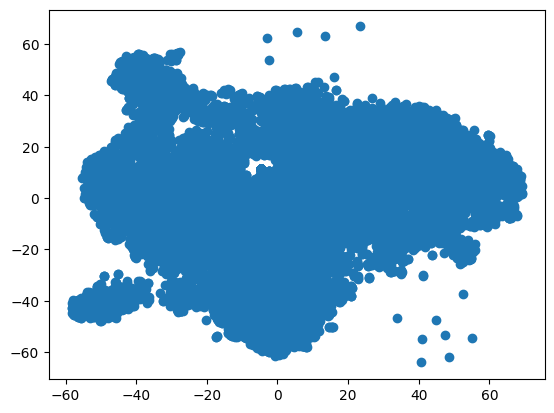

In [145]:
tsne = TSNE()
d = tsne.fit_transform(a_res)
plt.scatter(d[:, 0], d[:, 1])
plt.show()

---- SAMPLE 1 ----
cooking egg
--- SEARCH BY TEXT -> IMAGES ---


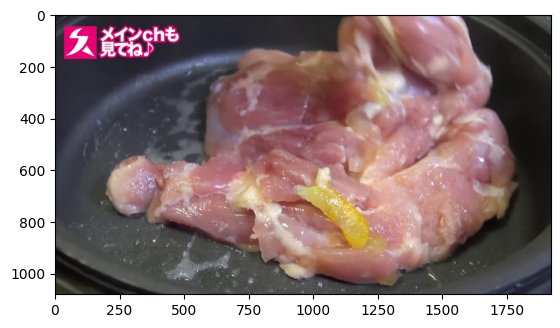

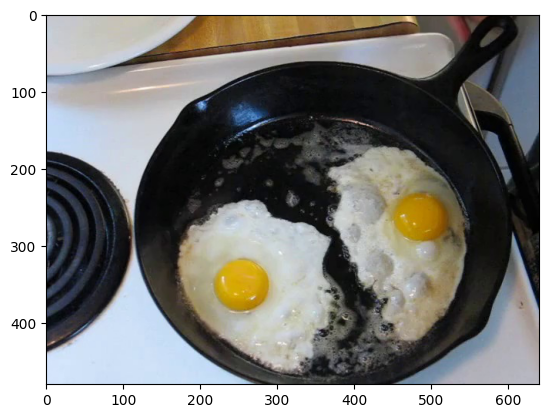

In [156]:
visual_validation(initial, ready, n_samples=1, n_neib=2, sby=TYPE_TEXT)

---- SAMPLE 1 ----


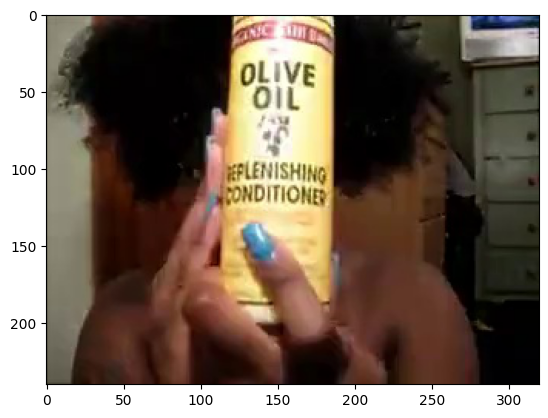

--- SEARCH BY IMAGE -> TEXTS ---
brushing hair


In [208]:
visual_validation(initial, ready, n_samples=1, n_neib=1, sby=TYPE_IMAGE)

---- SAMPLE 1 ----


--- SEARCH BY AUDIO -> IMAGE ---


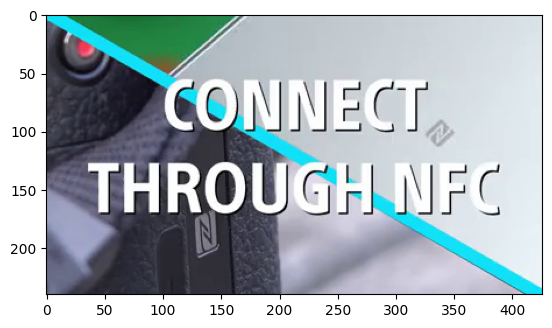

In [126]:
visual_validation(initial, ready, n_samples=1, n_neib=1, sby=TYPE_AUDIO)